In [5]:
%matplotlib inline
#import pycamhd as camhd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 12))

import lazyqt
import random

In [6]:
import time

class Timer(object):
    def __init__(self, verbose=False):
        self.verbose = verbose

    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, *args):
        self.end = time.time()
        self.secs = self.end - self.start
        self.msecs = self.secs * 1000  # millisecs
        if self.verbose:
            print( 'elapsed time: %f ms' % self.msecs)

In [7]:
local_filename = b'/data/CAMHDA301-20160724T030000Z.mov'
nginx_filename = b'http://localhost:7081/CAMHDA301-20160724T030000Z.mov'
ci_filename = b'https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/2016/07/24/CAMHDA301-20160724T030000Z.mov'

num_frames = 10

def random_frames( n_frames ):
    random.seed(1)   # I want this to be _non_-random
    return random.sample(range(25000), n_frames )

In [8]:
%%time
info = lazyqt.movie_info(local_filename)
print(info)

{'duration': 839.5720825195312, 'num_frames': 25162, 'valid': True}
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.54 ms


In [9]:
times = []
for i in random_frames(num_frames):
    with Timer() as t:
        frame = lazyqt.get_frame(local_filename, i)
    times.append(t)

msec = [t.msecs for t in times]
print("From local data: %f ms per frame" % np.mean(msec))

From local data: 38.072348 ms per frame


In [10]:
%%time
info = lazyqt.movie_info(ci_filename)
print(info)

{'duration': 839.5720825195312, 'num_frames': 25162, 'valid': True}
CPU times: user 48 ms, sys: 12 ms, total: 60 ms
Wall time: 350 ms


In [11]:
times = []
for i in random_frames(num_frames):
    with Timer() as t:
        frame = lazyqt.get_frame(ci_filename, i)
    times.append(t)

msec = [t.msecs for t in times]
print("From CI data: %f ms per frame" % np.mean(msec))

From CI data: 322.859859 ms per frame


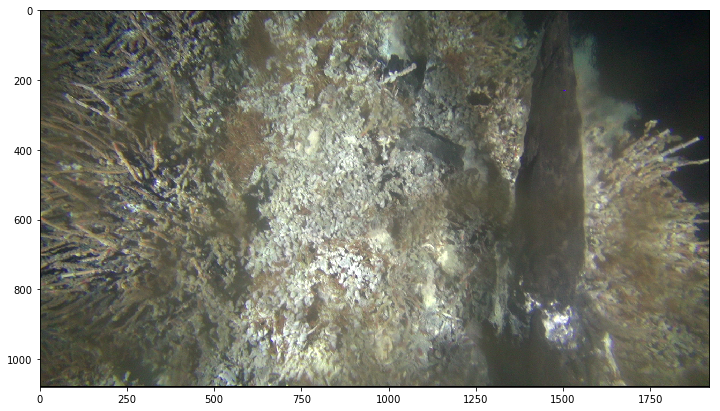

In [12]:
imgplot = plt.imshow(frame)

In [15]:
times = []
for i in random_frames(num_frames):
    with Timer() as t:
        frame = lazyqt.get_frame(nginx_filename, i)
    times.append(t)

msec = [t.msecs for t in times]
print("From local Nginx data: %f ms per frame" % np.mean(msec))

From local Nginx data: 38.480258 ms per frame
